# Car Price Prediction

Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit 
there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. 
Specifically, they want to understand the factors affecting the pricing of cars in the American market, 
since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars 
across the Americal market.

Business Goal

You are required to model the price of cars with the available independent variables. 
It will be used by the management to understand how exactly the prices vary with the independent variables. 
They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 
Further, the model will be a good way for management to understand the pricing dynamics of a new market.
    
    
    
Acknowledgements

"Automobile Data Set" from the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.



In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from collections import Counter

In [2]:
# Reading the dataset
cars=pd.read_csv("CarPrice.csv")

In [3]:
# Let's take a look at the first few rows
cars.head()

,symboling,normalized_losses,car_company,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,city_L/100km,horsepower_binned,diesel,gas,price
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,11.190476,Medium,0,1,13495
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,11.190476,Medium,0,1,16500
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,12.368421,Medium,0,1,16500
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,9.791667,Medium,0,1,13950
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,13.055556,Medium,0,1,17450


In [4]:
# Summary of the dataset: 201 rows, 29 columns, no null values
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
symboling            201 non-null int64
normalized_losses    201 non-null int64
car_company          201 non-null object
aspiration           201 non-null object
num_of_doors         201 non-null object
body_style           201 non-null object
drive_wheels         201 non-null object
engine_location      201 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
engine_type          201 non-null object
num_of_cylinders     201 non-null object
engine_size          201 non-null int64
fuel_system          201 non-null object
bore                 201 non-null float64
stroke               197 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-n

In [5]:
# Symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].value_counts()

 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [6]:
# Aspiration: An (internal combustion) engine property showing whether the oxygen intake is standard (through atmospheric 
# pressure) or through turbocharging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [7]:
# Drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drive_wheels'].astype('category').value_counts()

fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

mean      98.797015
median    97.000000
std        6.066366
skew       1.031261
kurt       0.948445
Name: wheel_base, dtype: float64


C:\Users\Shukur SK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


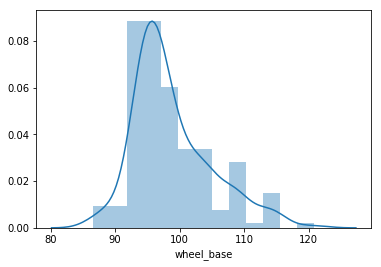

In [8]:
# Wheelbase: distance between centre of front and rarewheels
print(cars['wheel_base'].agg(["mean","median","std","skew","kurt"]))
sns.distplot(cars['wheel_base'])
plt.show()

Some of the data points are skewed to the right and the data is sharpen at the peak. 
and low standard deviation because few of the outliers also there.

C:\Users\Shukur SK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


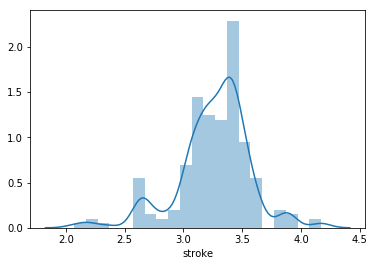

In [4]:
# Stroke: volume of the engine (the distance traveled by the piston in each cycle)
#a=cars['stroke'].describe()
#b=cars['stroke'].fillna(cars['stroke'].mean())
#print(a,b.describe())

# there is no much deviation in Stroke variable after filling NA values with mean so we are taking median for NA.
cars['stroke']=cars['stroke'].fillna(cars['stroke'].mean())# filling NA values with median because there is no much variation
cars['stroke'].astype('int64').dtypes # converting data type for visualization (float & NA values distplot will not take)
sns.distplot(cars['stroke'])

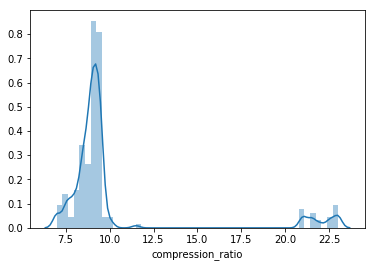

In [10]:
# Compression ration: ration of volume of compression chamber at largest capacity to least capacity
sns.distplot(cars['compression_ratio'])
plt.show()

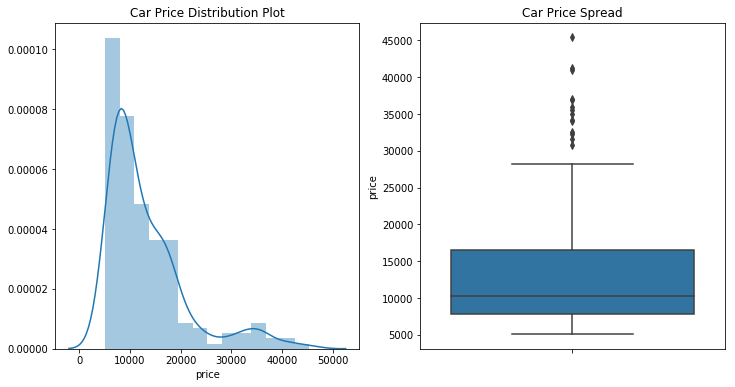

In [11]:
# Target variable: price of car
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [12]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
85%      18420.000000
90%      22470.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


The plot seemed to be right-skewed, meaning that the most prices in the dataset 
are low(Below 15,000).

There is a significant difference between the mean and the median of the price distribution.

The data points are far spread out from the mean, which indicates a high variance in the car prices.
(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

Visualising Categorical Data

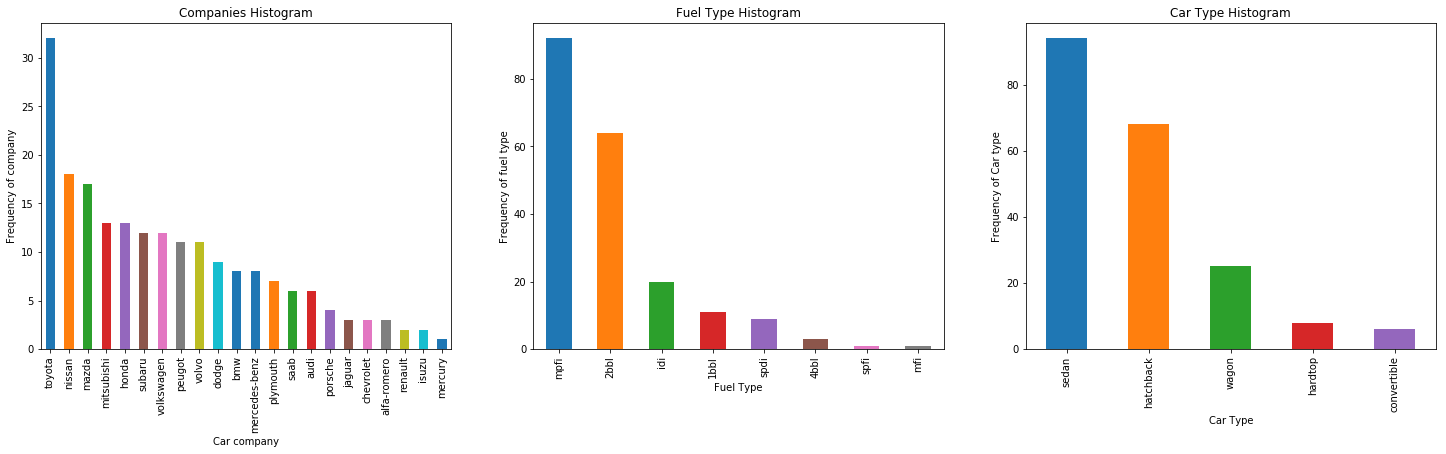

In [13]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.car_company.value_counts().plot('bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fuel_system.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.body_style.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

1.Toyota seemed to be favored car company.
2.mpfi fuel_system cars are more than other fuel_systems.
3.sedan is the top car type prefered.

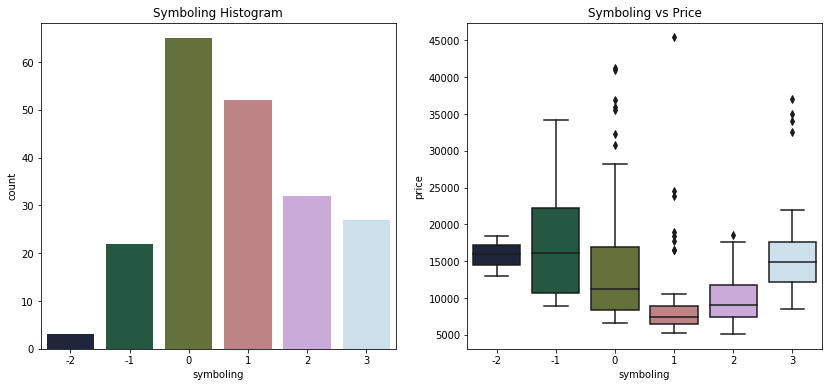

In [15]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

1.It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)

2.The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good).
  But it seems that symboling with 3 value has the price range similar to -2 value. 
  There is a dip in price at symboling 1.

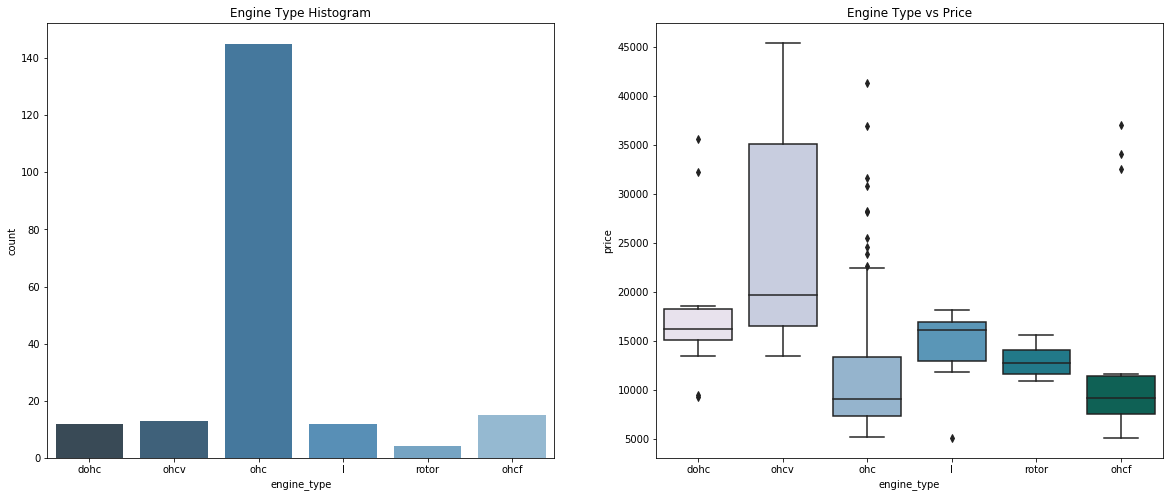

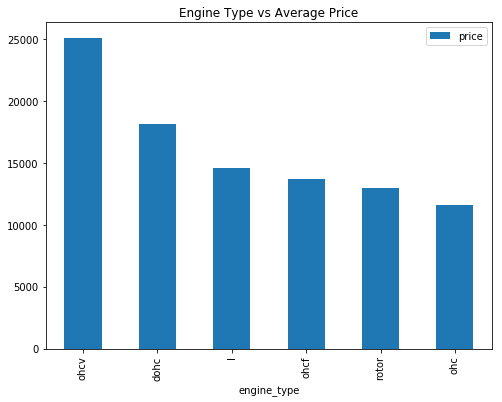

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.engine_type, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.engine_type, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['engine_type'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

1.ohc Engine type seems to be most favored type.

2.ohcv has the highest price range (While dohcv has only one row), 
  ohc and ohcf have the low price range.

<Figure size 1440x576 with 0 Axes>

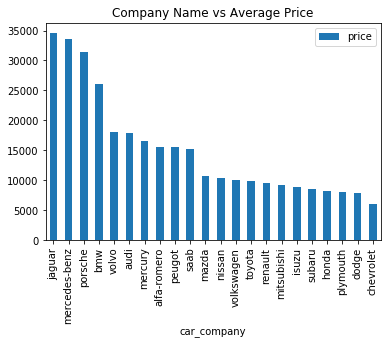

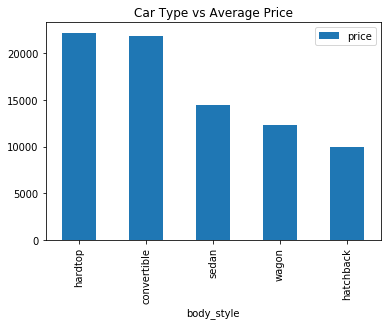

In [17]:
plt.figure(figsize=(20, 8))

df = pd.DataFrame(cars.groupby(['car_company'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['body_style'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

1.Jaguar and Buick seem to have highest average price.

2.hardtop and convertible have higher average price.

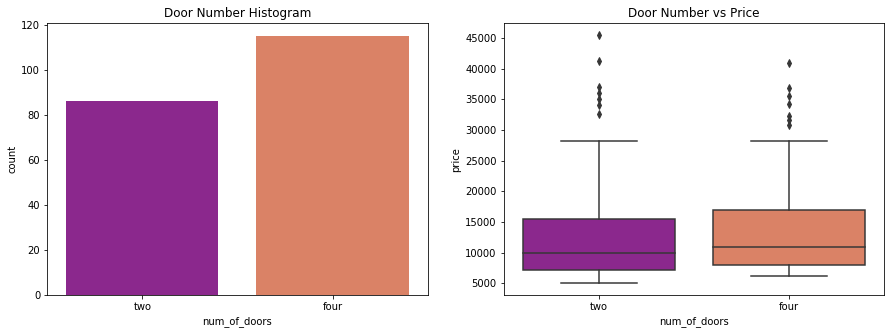

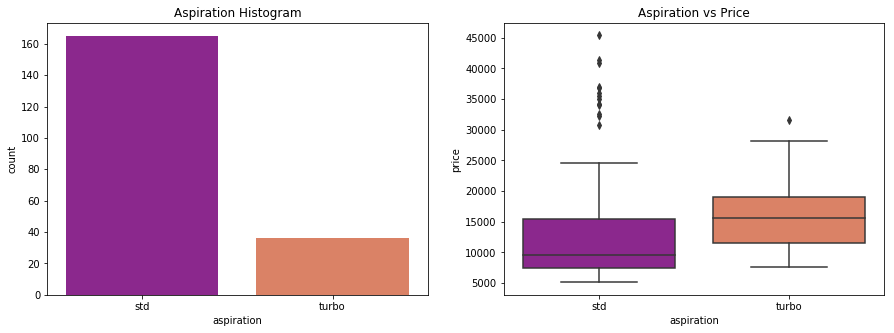

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.num_of_doors, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.num_of_doors, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

1.doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2.It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

Let's now make a pairwise scatter plot and observe linear relationships.

In [5]:
# Pairwise scatter plot

# All numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])

<Figure size 1440x720 with 0 Axes>

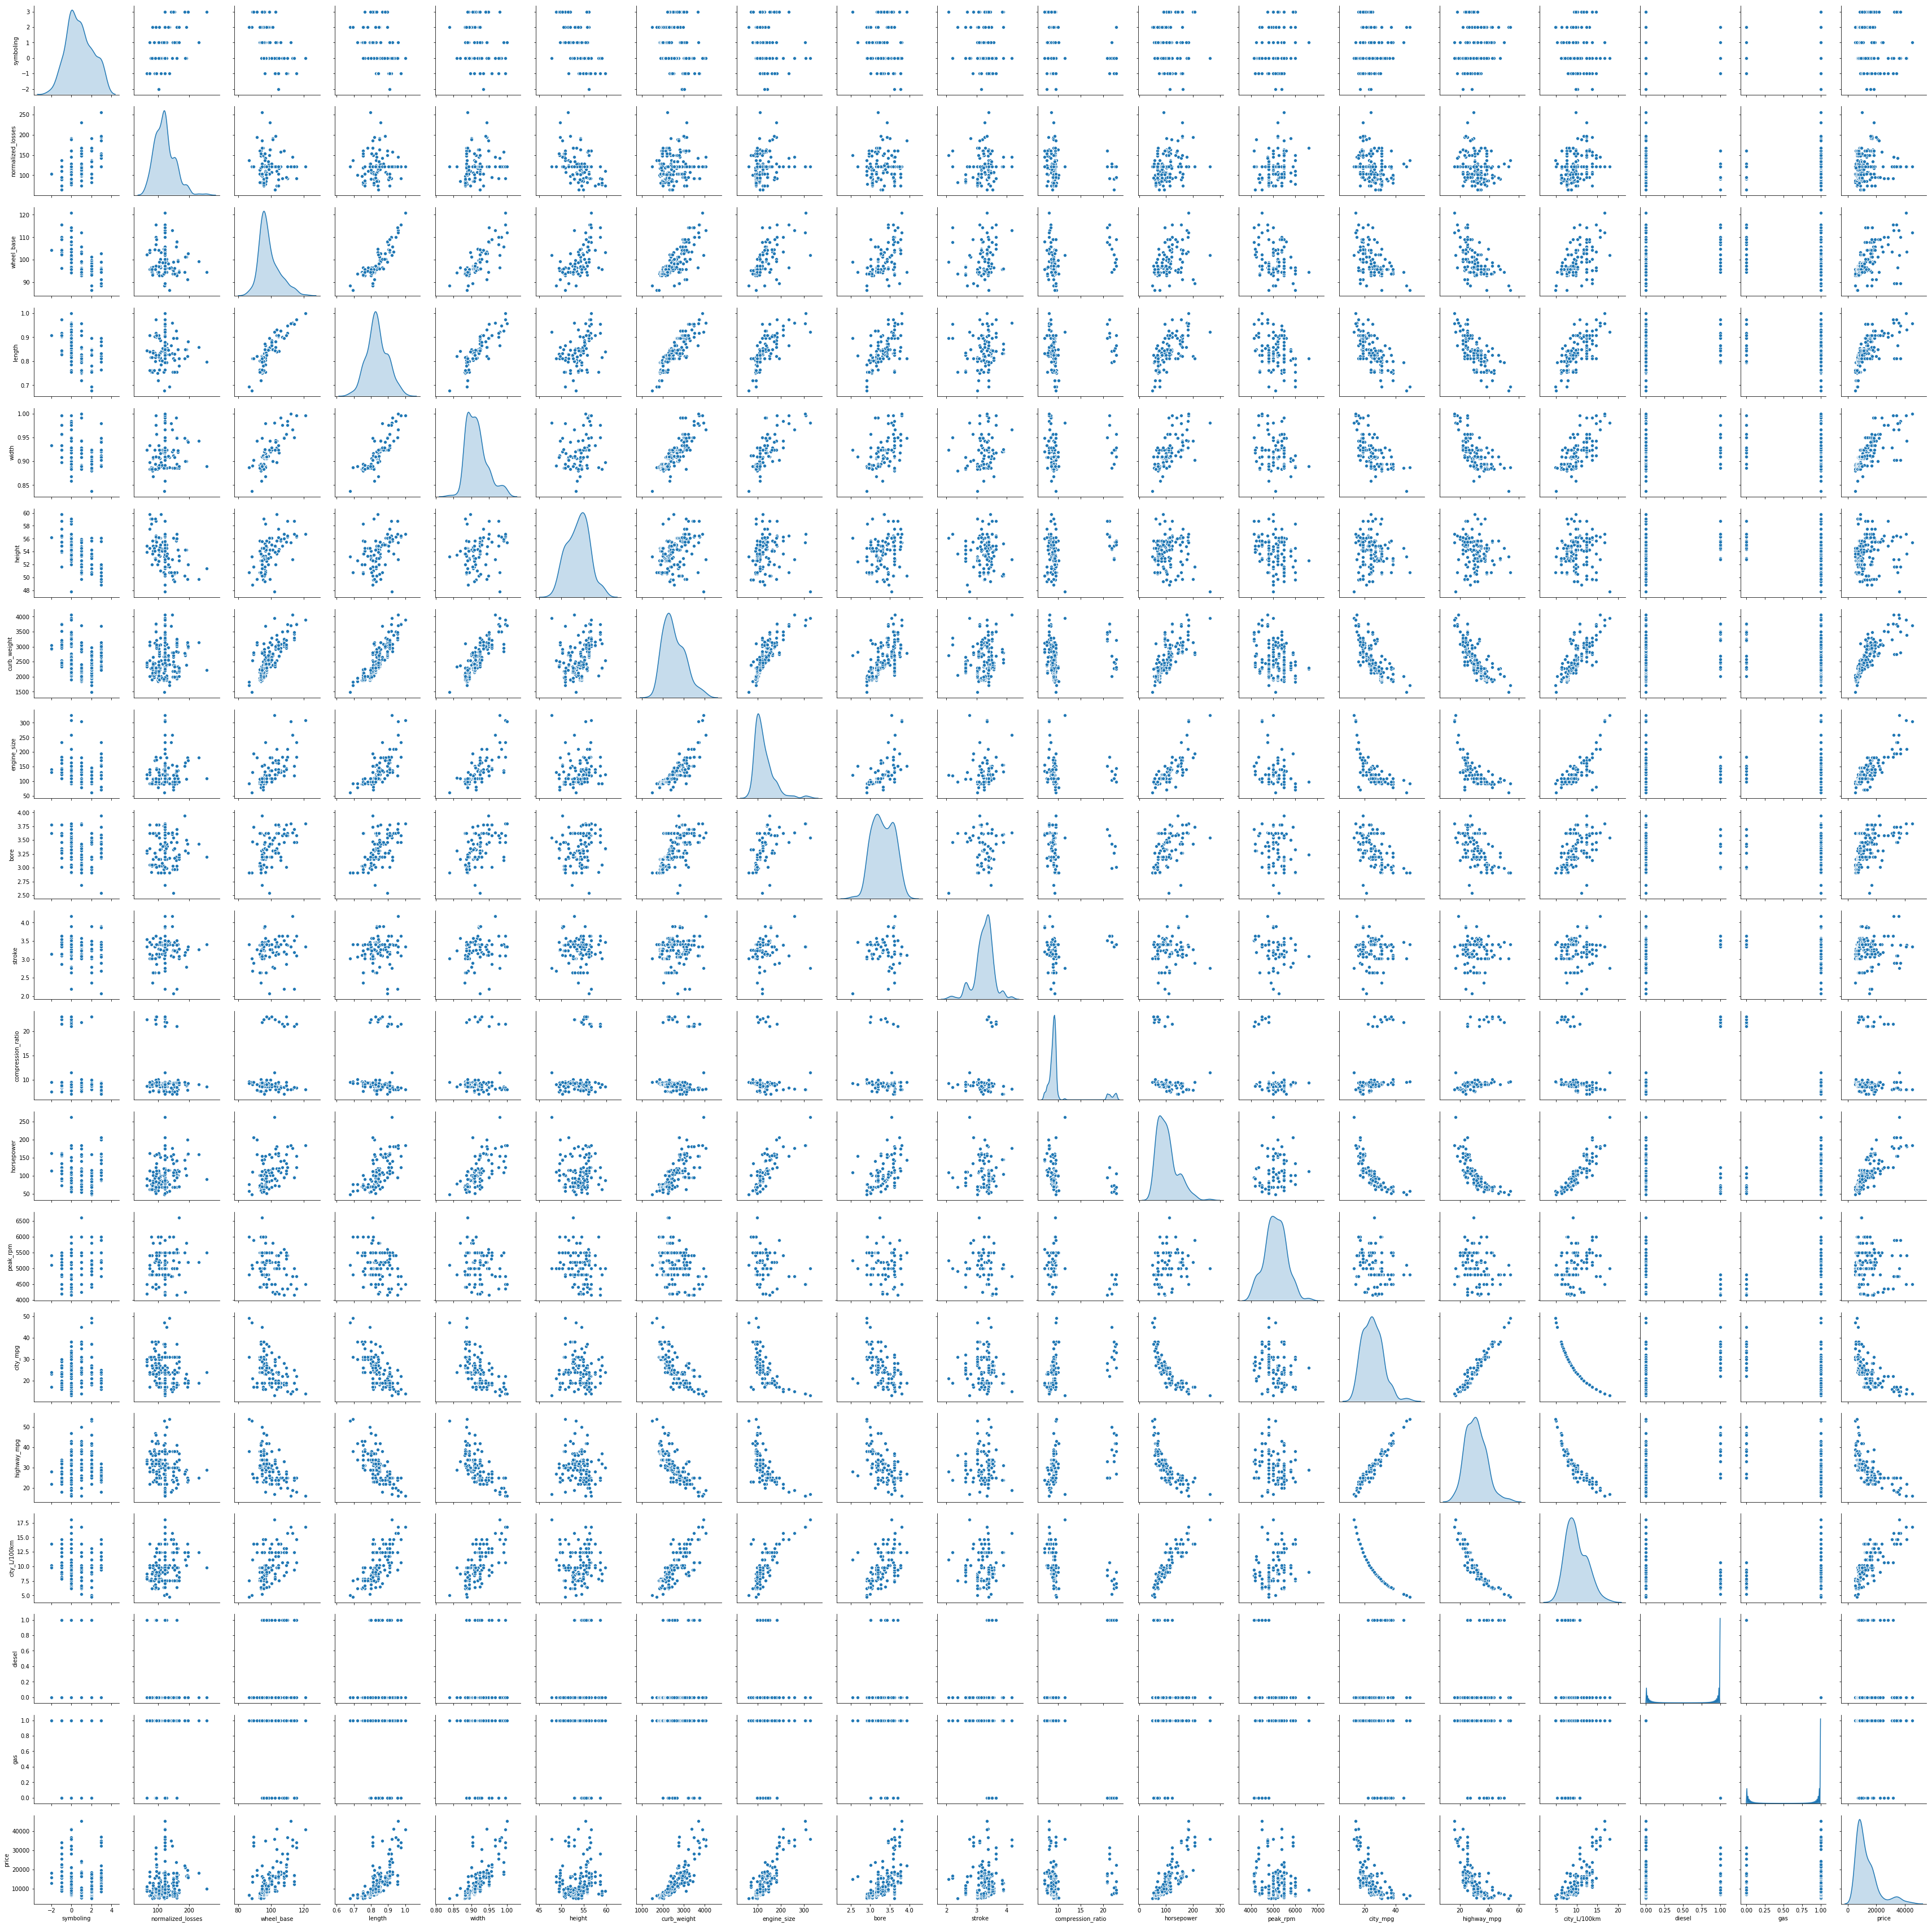

In [19]:
plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric, diag_kind = 'kde')
plt.show()

#did not consider other attributes such as number of doors, engine location etc due to low variance filter concept

#pair plot shows clearly some relation between price and height, curb weight, engine size, number of cylinders, 
horsepower and inversely related to mpg

The data seems to be a mix of cars of high end and economy leading to a cluster of points at lower end in many of 
the attributes, leading to a long tail in multiple attributes

In this context a decision tree and linear regression could be a good start.

This is quite hard to read, and we can rather plot correlations between variables. 
Also, a heatmap is pretty useful to visualise multiple correlations in one plot

In [6]:
# Correlation matrix
cor = cars_numeric.corr()
cor

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,city_L/100km,diesel,gas,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.007992,-0.182196,0.075819,0.279740,-0.035527,0.036233,0.066171,-0.196735,0.196735,-0.082391
normalized_losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055127,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.238567,-0.101546,0.101546,0.133999
wheel_base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.157964,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.476153,0.307237,-0.307237,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123913,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.657373,0.211187,-0.211187,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188814,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.673363,0.244356,-0.244356,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060822,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.003811,0.281578,-0.281578,0.135486
curb_weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167412,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.785353,0.221046,-0.221046,0.834415
engine_size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205806,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.745059,0.070779,-0.070779,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.554610,0.054458,-0.054458,0.543155
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.098282,-0.063388,-0.034079,-0.034741,0.036285,0.241033,-0.241033,0.082267


Let's plot the correlations on a heatmap for better visualisation

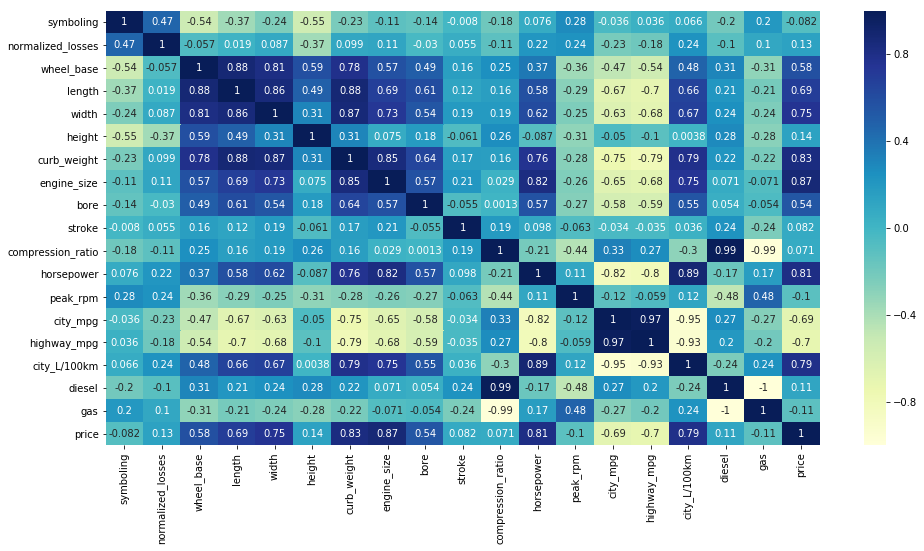

In [21]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [20]:
cars_numeric.corr().price.sort_values(ascending=False)

price                1.000000
engine_size          0.872335
curb_weight          0.834415
horsepower           0.809575
city_L/100km         0.789898
width                0.751265
length               0.690628
wheel_base           0.584642
bore                 0.543155
height               0.135486
normalized_losses    0.133999
diesel               0.110326
stroke               0.082267
compression_ratio    0.071107
symboling           -0.082391
peak_rpm            -0.101616
gas                 -0.110326
city_mpg            -0.686571
highway_mpg         -0.704692
Name: price, dtype: float64

engine_size, curb_weight, horsepower, city_L/100km, width, length, wheel_base and bore are having
a good relationship with price.

# Feature Importance

let's check Feature Importance for each variable

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
x=cars_numeric.iloc[:,1:-1]
y=cars_numeric.iloc[:,18:19]

In [11]:
# Apply SelectKBest Algorithm
# chi2 we usually use in clasification models it's like Information Gain
# but here i am taking for see just attribute information purpose how much information is having aech numaric variable
order_rank_feature=SelectKBest(score_func=chi2,k=17)#score_fun means which type of function score we want like chi2/f_regression
order_rank_feature.fit(x,y) # fiting x and Y values to the SelectKBest()

SelectKBest(k=17, score_func=<function chi2 at 0x00000276B309F510>)

In [12]:
#make a dataframe for better understanding
c_score=pd.DataFrame(order_rank_feature.scores_,columns=["Scores"])
c_clmn=pd.DataFrame(x.columns)

f_rank = pd.concat([c_clmn, c_score], axis=1) # concat feature scores to the x columns

f_rank.columns=["Features","Scores"] # take two features
f_rank.nlargest(10,"Scores") # lets see top 10 important features

,Features,Scores
5,curb_weight,20891.811269
11,peak_rpm,8790.592756
6,engine_size,2715.181888
10,horsepower,2685.369819
0,normalized_losses,1653.819672
12,city_mpg,324.914345
13,highway_mpg,299.390078
9,compression_ratio,297.467217
15,diesel,170.950000
14,city_L/100km,128.623289


In [13]:
# f_regression use for feature selection in regression models
from sklearn.feature_selection import f_regression

f=f_regression(x,y)

reg_f=pd.DataFrame({"Features":x.columns,"F_Score":f[0],"Probability_value":f[1]})

reg_f.sort_values(by="Probability_value",ascending=True)

C:\Users\Shukur SK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Features,F_Score,Probability_value
6,engine_size,633.526760,9.265492e-64
5,curb_weight,456.138858,2.189577e-53
10,horsepower,378.499538,6.369057e-48
14,city_L/100km,330.168178,3.903106e-44
3,width,257.840739,9.200331e-38
13,highway_mpg,196.304960,1.749547e-31
2,length,181.473533,8.016476e-30
12,city_mpg,177.451714,2.321132e-29
1,wheel_base,103.342498,8.076488e-20
7,bore,83.276619,8.049189e-17


In [14]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = cars_numeric.iloc[:,:-1].columns
vif['VIF'] = [variance_inflation_factor(cars_numeric.iloc[:,:-1].values, i) for i in range(cars_numeric.iloc[:,:-1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,gas,5467.24
16,diesel,764.24
10,compression_ratio,58.75
13,city_mpg,37.53
14,highway_mpg,25.74
15,city_L/100km,21.70
6,curb_weight,16.97
3,length,10.37
11,horsepower,9.99
2,wheel_base,9.32


# Feature Selection

In [5]:
# A function to map the categorical levels to actual numbers. You can see the categorical levels above and use them for mapping.
def num_map(x):
    return x.map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})

# Applying the function to the two columns
cars[['num_of_cylinders']] = cars[['num_of_cylinders']].apply(num_map)

Let's now create dummy variables for the categorical variables

In [6]:
cars=cars.drop("horsepower_binned", axis=1)

In [7]:
# Subset all categorical variables
cars_categorical = cars.select_dtypes(include=['object'])
cars_categorical.head()

,car_company,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,fuel_system
0,alfa-romero,std,two,convertible,rwd,front,dohc,mpfi
1,alfa-romero,std,two,convertible,rwd,front,dohc,mpfi
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,mpfi
3,audi,std,four,sedan,fwd,front,ohc,mpfi
4,audi,std,four,sedan,4wd,front,ohc,mpfi


In [8]:
# Convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,car_company_audi,car_company_bmw,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercedes-benz,car_company_mercury,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# Drop categorical variable columns
cars = cars.drop(list(cars_categorical.columns), axis=1)

In [10]:
# Concatenate dummy variables with X
cars = pd.concat([cars, cars_dummies], axis=1)

# Let's check the first few rows
cars.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,122,88.6,0.811148,0.890278,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,122,88.6,0.811148,0.890278,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,122,94.5,0.822681,0.909722,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,164,99.8,0.848630,0.919444,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,0.848630,0.922222,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


# Split and Scaling

In [11]:
cars.columns

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'num_of_cylinders', 'engine_size', 'bore',
       'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'city_L/100km', 'diesel', 'gas', 'price',
       'car_company_audi', 'car_company_bmw', 'car_company_chevrolet',
       'car_company_dodge', 'car_company_honda', 'car_company_isuzu',
       'car_company_jaguar', 'car_company_mazda', 'car_company_mercedes-benz',
       'car_company_mercury', 'car_company_mitsubishi', 'car_company_nissan',
       'car_company_peugot', 'car_company_plymouth', 'car_company_porsche',
       'car_company_renault', 'car_company_saab', 'car_company_subaru',
       'car_company_toyota', 'car_company_volkswagen', 'car_company_volvo',
       'aspiration_turbo', 'num_of_doors_two', 'body_style_hardtop',
       'body_style_hatchback', 'body_style_sedan', 'body_style_wagon',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'e

In [12]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(cars, train_size=0.7, test_size=0.3, random_state=100)

In [13]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'num_of_cylinders', 'engine_size', 'bore',
       'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'city_L/100km', 'diesel', 'gas', 'price',
       'car_company_audi', 'car_company_bmw', 'car_company_chevrolet',
       'car_company_dodge', 'car_company_honda', 'car_company_isuzu',
       'car_company_jaguar', 'car_company_mazda', 'car_company_mercedes-benz',
       'car_company_mercury', 'car_company_mitsubishi', 'car_company_nissan',
       'car_company_peugot', 'car_company_plymouth', 'car_company_porsche',
       'car_company_renault', 'car_company_saab', 'car_company_subaru',
       'car_company_toyota', 'car_company_volkswagen', 'car_company_volvo',
       'aspiration_turbo', 'num_of_doors_two', 'body_style_hardtop',
       'body_style_hatchback', 'body_style_sedan', 'body_style_wagon',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine_location_rear',
       'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf',
       'engine_type_ohcv', 'engine_type_rotor', 'fuel_system_2bbl',
       'fuel_system_4bbl', 'fuel_system_idi', 'fuel_system_mfi',
       'fuel_system_mpfi', 'fuel_system_spdi', 'fuel_system_spfi']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

C:\Users\Shukur SK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shukur SK\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Shukur SK\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shukur SK\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [14]:
# Let's take a look at the train dataframe now
df_train.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
162,0.155703,1.467673,-0.726874,-0.463942,-0.862132,-0.586545,-0.496610,-0.342084,-0.679759,-0.328521,...,-0.292013,-0.262111,-0.147979,-0.722315,-0.120386,-0.34641,0.0,1.171700,-0.229416,-0.084819
75,0.994101,1.243146,-0.853839,-1.359288,-0.675725,-1.343377,-1.064228,-0.342084,-0.827037,-1.298743,...,-0.292013,-0.262111,-0.147979,1.384437,-0.120386,-0.34641,0.0,-0.853461,-0.229416,-0.084819
3,0.994101,1.339372,0.114268,0.156517,0.163106,0.128241,-0.425658,-0.342084,-0.409749,-0.508192,...,-0.292013,-0.262111,-0.147979,-0.722315,-0.120386,-0.34641,0.0,1.171700,-0.229416,-0.084819
186,1.832500,4.290298,-0.726874,-0.699559,-0.862132,-1.091100,-0.648103,-0.342084,-0.409749,-0.508192,...,-0.292013,-0.262111,-0.147979,-0.722315,-0.120386,-0.34641,0.0,1.171700,-0.229416,-0.084819
140,-0.682696,-0.649295,-0.330109,-0.204763,-0.209708,0.128241,-0.333612,-0.342084,-0.434295,1.036975,...,3.424511,-0.262111,-0.147979,1.384437,-0.120386,-0.34641,0.0,-0.853461,-0.229416,-0.084819


In [15]:
# Split the train dataset into X and y

y_train = df_train.pop('price')
X_train = df_train

# Model Building

In [16]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-8.21699993e-03  1.22196351e-02  2.58199444e-01 -2.05282709e-01
  7.75581351e-02 -7.59986253e-02  2.58804385e-01 -2.46165171e-02
  4.63728384e-01 -8.15942935e-02 -5.07271914e-02 -2.57955788e-03
 -7.49703492e-02  9.93831027e-02  3.14884680e-01  1.33319145e-01
  5.60153739e-01 -4.57941706e-03  4.57941706e-03  3.46843135e-02
  1.27389319e-01 -9.08490200e-02 -1.26568577e-01 -5.28550292e-02
 -7.81219609e-02 -1.37941183e-02 -4.17172348e-02  9.67912076e-02
 -3.40531810e-02 -1.22836852e-01 -9.39489846e-02 -2.07475237e-01
 -1.01576712e-01  6.23926659e-02 -1.38777878e-17  7.13279907e-02
 -4.01084408e-02 -1.20865500e-01 -5.55428743e-03 -3.24204651e-02
  1.71930757e-01 -6.58376824e-02 -7.65096819e-03 -1.38994120e-01
 -1.41991456e-01 -8.44199318e-02 -3.77479719e-02  9.95970708e-02
  8.18061044e-02  4.82946932e-02  2.56334791e-02 -1.27861841e-02
 -4.15579394e-02  3.82184159e-02  7.64320002e-02 -2.47126938e-02
 -4.57941706e-03  0.00000000e+00 -3.56149587e-02 -2.18218246e-02
  3.18248887e-02]
1.06071

Model Building Using RFE

Now, you have close to 60 features. It is obviously not possible to manually eliminate these features. 
So let's now build a model using recursive feature elimination to select features. 
We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), 
and then use the `statsmodels` library to build models using the shortlisted features 
(this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [18]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=15, step=1, verbose=0)

Model Building and Evaluation

Let's now check the summary of this model using statsmodels.

In [19]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,wheel_base,length,width,curb_weight,engine_size,city_mpg,city_L/100km,car_company_bmw,car_company_mercedes-benz,car_company_peugot,car_company_saab,body_style_hatchback,body_style_sedan,drive_wheels_rwd,engine_location_rear
162,1.0,-0.726874,-0.463942,-0.862132,-0.496610,-0.679759,0.136386,-0.359211,-0.211604,-0.19245,-0.262111,-0.211604,1.384437,-0.944400,1.321022,-0.084819
75,1.0,-0.853839,-1.359288,-0.675725,-1.064228,-0.827037,0.938656,-0.945469,-0.211604,-0.19245,-0.262111,-0.211604,1.384437,-0.944400,-0.756990,-0.084819
3,1.0,0.114268,0.156517,0.163106,-0.425658,-0.409749,-0.184522,-0.056311,-0.211604,-0.19245,-0.262111,-0.211604,-0.722315,1.058873,-0.756990,-0.084819
186,1.0,-0.726874,-0.699559,-0.862132,-0.648103,-0.409749,-0.184522,-0.056311,-0.211604,-0.19245,-0.262111,-0.211604,1.384437,-0.944400,-0.756990,-0.084819
140,1.0,-0.330109,-0.204763,-0.209708,-0.333612,-0.434295,-0.184522,-0.056311,-0.211604,-0.19245,-0.262111,-0.211604,-0.722315,1.058873,-0.756990,-0.084819


In [20]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     162.1
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           8.71e-74
Time:                        20:20:17   Log-Likelihood:                 13.133
No. Observations:                 140   AIC:                             5.734
Df Residuals:                     124   BIC:                             52.80
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [21]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,city_L/100km,16.55
4,curb_weight,14.85
2,length,14.45
6,city_mpg,14.26
1,wheel_base,9.90
3,width,7.31
5,engine_size,6.64
12,body_style_hatchback,2.97
14,drive_wheels_rwd,2.41
13,body_style_sedan,2.32


These variables aren't of use. But manually elimination is time consuming and makes the code unnecessarily long. 
Let's try and build a model with 10 features this time using RFE and see what we get.

In [31]:
# RFE with 10 features
from sklearn.feature_selection import RFE

# RFE with 10 features
lm = LinearRegression()
rfe2 = RFE(lm, 10)

# Fit with 10 features
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [32]:
# Subset the features selected by rfe2
col2 = X_train.columns[rfe2.support_]

# Subsetting training data for 10 selected columns
X_train_rfe2 = X_train[col2]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 10 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     187.6
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           9.19e-72
Time:                        20:24:44   Log-Likelihood:                -6.6163
No. Observations:                 140   AIC:                             35.23
Df Residuals:                     129   BIC:                             67.59
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Note that the adjusted R-squared value hasn't dropped much practically. 
It has went from 0.92 to 0.89. So 10 variables seems to be a good number to start with.

In [33]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,city_L/100km,15.95
6,city_mpg,13.96
4,curb_weight,11.51
2,length,9.18
1,wheel_base,7.34
3,width,6.24
5,engine_size,5.60
9,car_company_mercedes-benz,1.73
8,car_company_bmw,1.16
10,engine_location_rear,1.15


There are still some variables that need to be dropped.

In [34]:
X_train_rfe2.drop(['length','city_L/100km','city_mpg','curb_weight','wheel_base'] ,axis = 1, inplace = True)

In [35]:
# Refitting with 7 variables

X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 9 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     237.2
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           9.81e-65
Time:                        20:24:57   Log-Likelihood:                -38.512
No. Observations:                 140   AIC:                             89.02
Df Residuals:                     134   BIC:                             106.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,engine_size,2.95
1,width,2.52
4,car_company_mercedes-benz,1.53
5,engine_location_rear,1.09
3,car_company_bmw,1.08
0,const,1.00


All the VIF values and p-values seem to be in a good range. 
Also the Adjusted R-squared value has dropped from 0.94 with 14 variables to just 0.895 using 5 variables. 
This model is explaining most of the variance without being too complex. 
So let's proceed with this model.

# Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

C:\Users\Shukur SK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

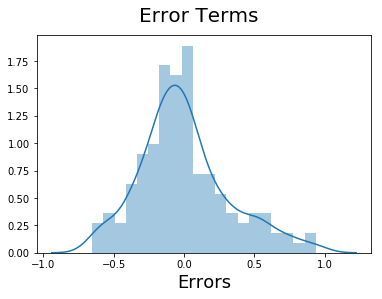

In [36]:
y_train_price = lm2.predict(X_train_rfe2)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)                         

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.
Let's now make predictions on the test-set.

# Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [37]:
df_test[varlist] = scaler.transform(df_test[varlist])

C:\Users\Shukur SK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\Shukur SK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shukur SK\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('price')
X_test = df_test

In [39]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
col2

Index(['wheel_base', 'length', 'width', 'curb_weight', 'engine_size',
       'city_mpg', 'city_L/100km', 'car_company_bmw',
       'car_company_mercedes-benz', 'engine_location_rear'],
      dtype='object')

In [40]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col2]

In [41]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['length','city_L/100km','city_mpg','curb_weight','wheel_base'], axis = 1)

In [42]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 77 to 69
Data columns (total 6 columns):
const                        61 non-null float64
width                        61 non-null float64
engine_size                  61 non-null float64
car_company_bmw              61 non-null float64
car_company_mercedes-benz    61 non-null float64
engine_location_rear         61 non-null float64
dtypes: float64(6)
memory usage: 3.3 KB


In [43]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

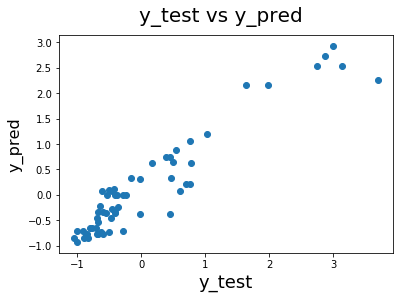

In [44]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [45]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8870253024111135

In [47]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     237.2
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           9.81e-65
Time:                        20:37:58   Log-Likelihood:                -38.512
No. Observations:                 140   AIC:                             89.02
Df Residuals:                     134   BIC:                             106.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

1.R-sqaured and Adjusted R-squared (extent of fit) - 0.899 and 0.895 - 90% variance explained.

2.F-stats and Prob(F-stats) (overall model fit) - 237.2 and 9.81e-65(approx. 0.0) - 
  Model fit is significant and explained 90% variance is just not by chance.

3.p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - 
  meaning that all the predictors are statistically significant.